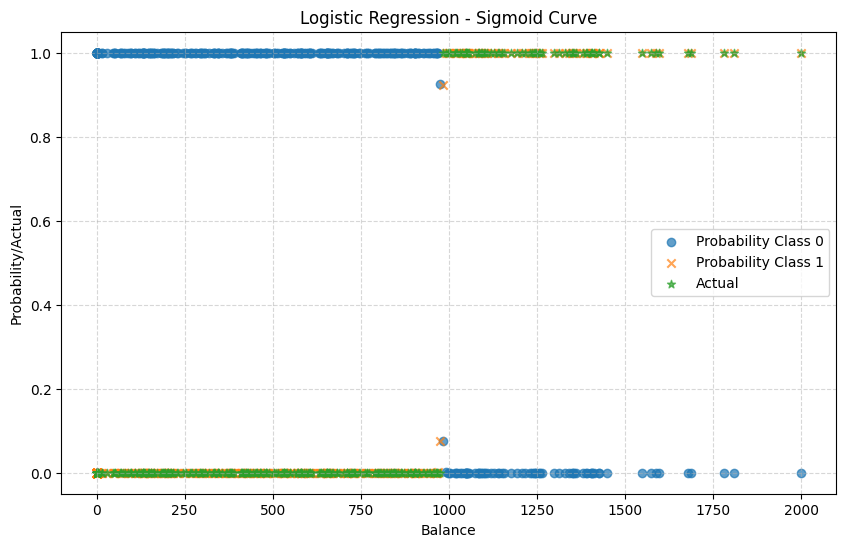

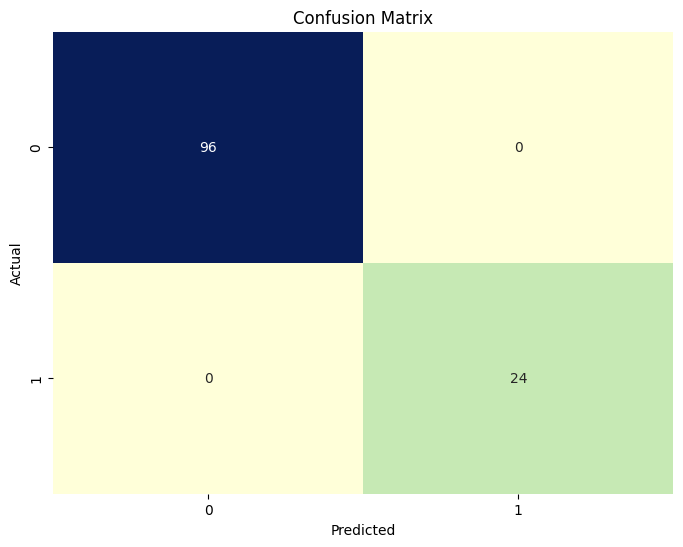

   Feature     F-Value       P-Value
0  Balance  169.903057  1.326267e-24
1  Student    6.464834  1.229753e-02
2   Income   30.587183  1.947321e-07


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import f_classif

# Load the credit dataset
credit_data = pd.read_csv('F:/IIT 1st Semester/Assignment/ML/3/Credit.csv')

# Preprocess data: Convert categorical to numerical
credit_data['Defaultee'] = credit_data['Defaultee'].replace(['No', 'yes'], [0, 1])
credit_data['Student'] = credit_data['Student'].map({'No': 0, 'Yes': 1})

# Apply Logistic Regression to verify sigmoid function
logistic_model = LogisticRegression()
logistic_model.fit(credit_data[['Balance']], credit_data['Defaultee'])
predicted_prob = logistic_model.predict_proba(credit_data[['Balance']])

# Visualize sigmoid curve
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Balance'], predicted_prob[:, 0], label='Probability Class 0', marker='o', alpha=0.7)
plt.scatter(credit_data['Balance'], predicted_prob[:, 1], label='Probability Class 1', marker='x', alpha=0.7)
plt.scatter(credit_data['Balance'], credit_data['Defaultee'], label='Actual', marker='*', alpha=0.7)
plt.legend()
plt.xlabel('Balance')
plt.ylabel('Probability/Actual')
plt.title('Logistic Regression - Sigmoid Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Logistic Regression with multiple features
features = credit_data[['Balance', 'Student', 'Income']]
target = credit_data['Defaultee']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform ANOVA test for feature significance
f_values, p_values = f_classif(X_test, y_pred)

# Feature significance table
anova_results = pd.DataFrame({'Feature': X_test.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_results)
